In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [26]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)
data = pd.read_csv('data/cancer_reg.csv',encoding='cp1252')
print(data.shape)
data.head()

(3047, 34)


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


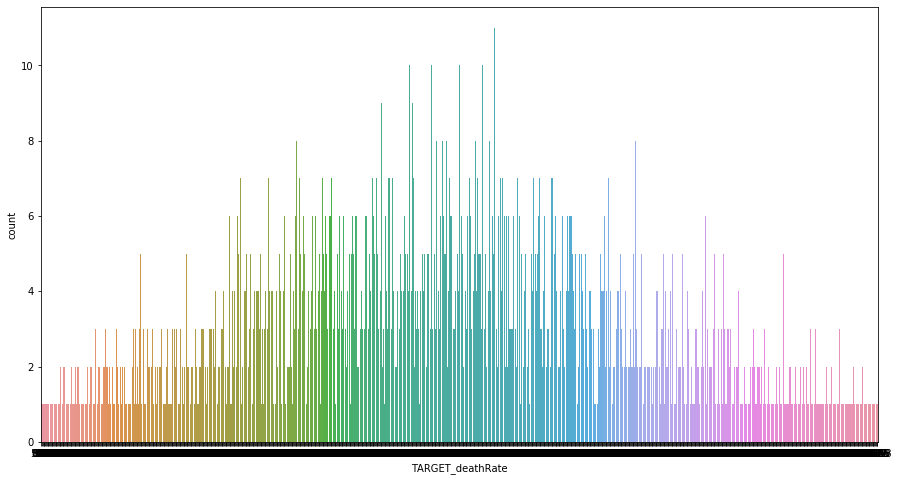

In [3]:
plt.figure(figsize=(15,8))
sns.countplot(x='TARGET_deathRate', data=data);


In [27]:
##################################################################################
### splitting Geography in 2 columns -- State and County -- and dropping Geography
data[['County','State']] = data.Geography.apply(lambda x: pd.Series(str(x).split(",")))
data = data.drop(['Geography'],axis=1)

#print(data["State"].value_counts())
#print(data["County"].value_counts())
print(data["State"].nunique())         ### unique values
print(data["County"].nunique())        ### unique values

##################################################################################
### Encoding the columns State and County -- and dropping the Categorical columns
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
data["StateCode"] = lb_make.fit_transform(data["State"])
data["CountyCode"] = lb_make.fit_transform(data["County"])
data = data.drop(['State','County'],axis=1)

print(data["StateCode"].nunique())         ### unique values
print(data["CountyCode"].nunique())        ### unique values

data.head()

51
1819
51
1819


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,StateCode,CountyCode
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,47,875
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,47,876
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,47,880
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,47,944
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,47,950


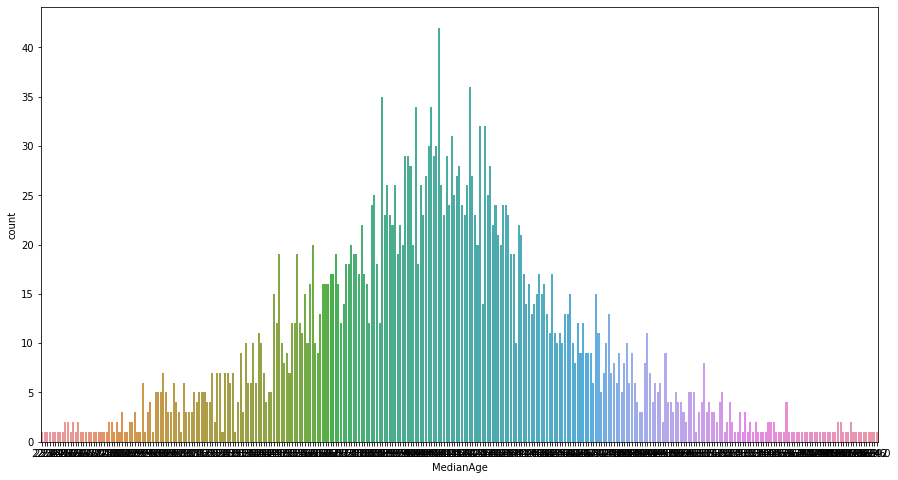

In [5]:
plt.figure(figsize=(15,8))
sns.countplot(x='MedianAge', data=data);

In [6]:
print(data.shape) ### (3047, 35)
data.dtypes

(3047, 35)


avgAnnCount                float64
avgDeathsPerYear             int64
TARGET_deathRate           float64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite                   float64
PctBlack            

In [7]:
#print(data["StateCode"].value_counts())
#print(data["CountyCode"].value_counts())
print(data.nunique()) 


avgAnnCount                 929
avgDeathsPerYear            608
TARGET_deathRate           1053
incidenceRate              1506
medIncome                  2920
popEst2015                 2999
povertyPercent              333
studyPerCap                1117
binnedInc                    10
MedianAge                   325
MedianAgeMale               298
MedianAgeFemale             296
AvgHouseholdSize            199
PercentMarried              362
PctNoHS18_24                405
PctHS18_24                  469
PctSomeCol18_24             343
PctBachDeg18_24             219
PctHS25_Over                361
PctBachDeg25_Over           281
PctEmployed16_Over          409
PctUnemployed16_Over        195
PctPrivateCoverage          498
PctPrivateCoverageAlone     459
PctEmpPrivCoverage          450
PctPublicCoverage           395
PctPublicCoverageAlone      319
PctWhite                   3044
PctBlack                   2972
PctAsian                   2852
PctOtherRace               2903
PctMarri

In [8]:
data['binnedInc'].value_counts()

(45201, 48021.6]      306
[22640, 34218.1]      306
(54545.6, 61494.5]    306
(42724.4, 45201]      305
(51046.4, 54545.6]    305
(48021.6, 51046.4]    305
(34218.1, 37413.8]    304
(37413.8, 40362.7]    304
(40362.7, 42724.4]    304
(61494.5, 125635]     302
Name: binnedInc, dtype: int64

In [28]:
#print(data['Geography'].nunique()) ### counties
#print(data['Geography'].isna().sum()) ### all NOT NULL #### CAN BE DROPPED!!!

#WE DON’T NEED THE 'binnedInc' SO DELETE
######################################################data = data.drop(['Geography'],axis=1)
data = data.drop(['binnedInc'],axis=1)
print(data.shape)
#print(data.nunique())         ### unique values
#print(pd.isnull(data).sum())  ### null values
data = data.fillna(value=0) 

(3047, 34)


In [29]:
def remove_outliers(data, k=3):
    mu       = data.mean() # get the mean
    sigma    = data.std()  # get the standard deviation
    filtered = data[(mu - k*sigma < data) & (data < mu + k*sigma)]
    return filtered

data = data.apply(remove_outliers) ###### apply to ALL THE COLUMNS!!!
##### drop nulls
data = data.dropna()
print(data.shape)
data.head()

(2329, 34)


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,StateCode,CountyCode
0,1397.0,469.0,164.9,489.8,61898.0,260131.0,11.2,499.748204,39.3,36.9,41.7,2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,0.0,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,47,875
1,173.0,70.0,161.3,411.6,48127.0,43269.0,18.6,23.111234,33.0,32.2,33.7,2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,47,876
2,102.0,50.0,174.7,349.7,49348.0,21026.0,14.6,47.560164,45.0,44.0,45.8,2.62,54.2,24.0,36.6,0.0,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,47,880
3,427.0,202.0,194.8,430.4,44243.0,75882.0,17.1,342.637253,42.8,42.2,43.4,2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,47,944
4,57.0,26.0,144.4,350.1,49955.0,10321.0,12.5,0.000000,48.3,47.8,48.9,2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,47,950


In [ ]:
avgAnnCount	 Mean number of reported cases of cancer diagnosed annually(a)
avgDeathsPerYear	 Mean number of reported mortalities due to cancer(a)
incidenceRate	 Mean per capita (100,000) cancer diagoses(a)
medIncome	 Median income per county (b)
PctBachDeg25_Over	 Percent of county residents ages 25 and over highest education attained  bachelor's degree (b)


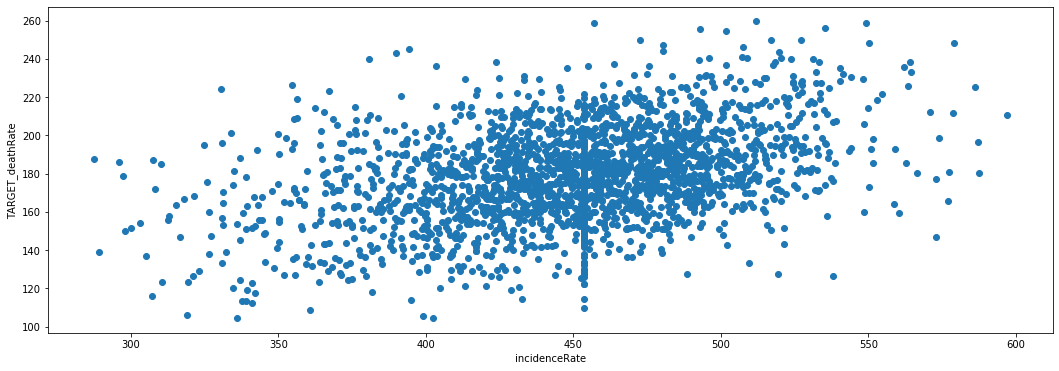

In [11]:
#PLOT THE RELATION:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))
plt.xlabel("incidenceRate") 
plt.ylabel("TARGET_deathRate")
plt.scatter(data['incidenceRate'],data['TARGET_deathRate'])

In [12]:
data.shape

(2329, 34)

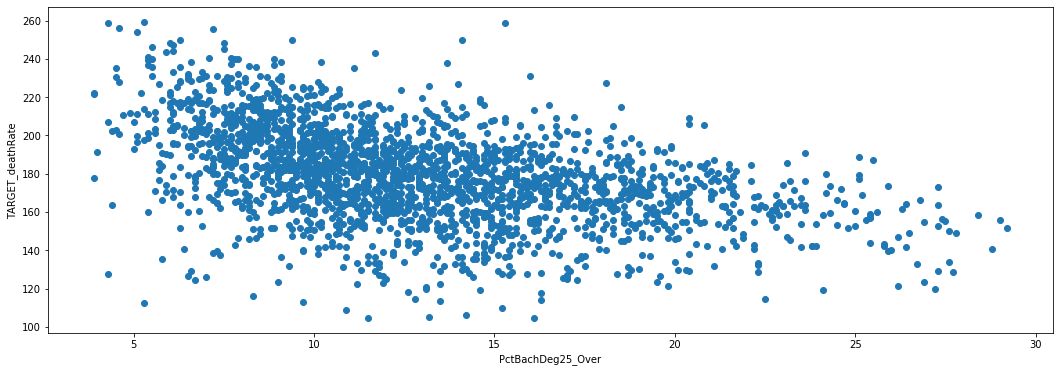

In [13]:
#PLOT THE RELATION:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))
plt.xlabel("PctBachDeg25_Over") ### Percent of county residents ages 25 and over highest education attained: bachelor's degree
plt.ylabel("TARGET_deathRate")
plt.scatter(data['PctBachDeg25_Over'],data['TARGET_deathRate'])

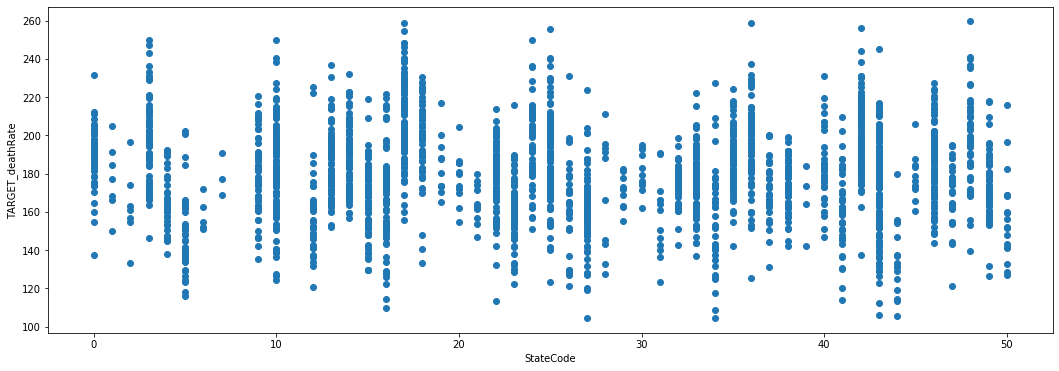

In [14]:
#PLOT THE RELATION:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))
plt.xlabel("StateCode") ### Percent of county residents ages 25 and over highest education attained: bachelor's degree
plt.ylabel("TARGET_deathRate")
plt.scatter(data['StateCode'],data['TARGET_deathRate'])

In [15]:
data.shape #### 2329 rows!!! (original 3047 rows)

(2329, 34)

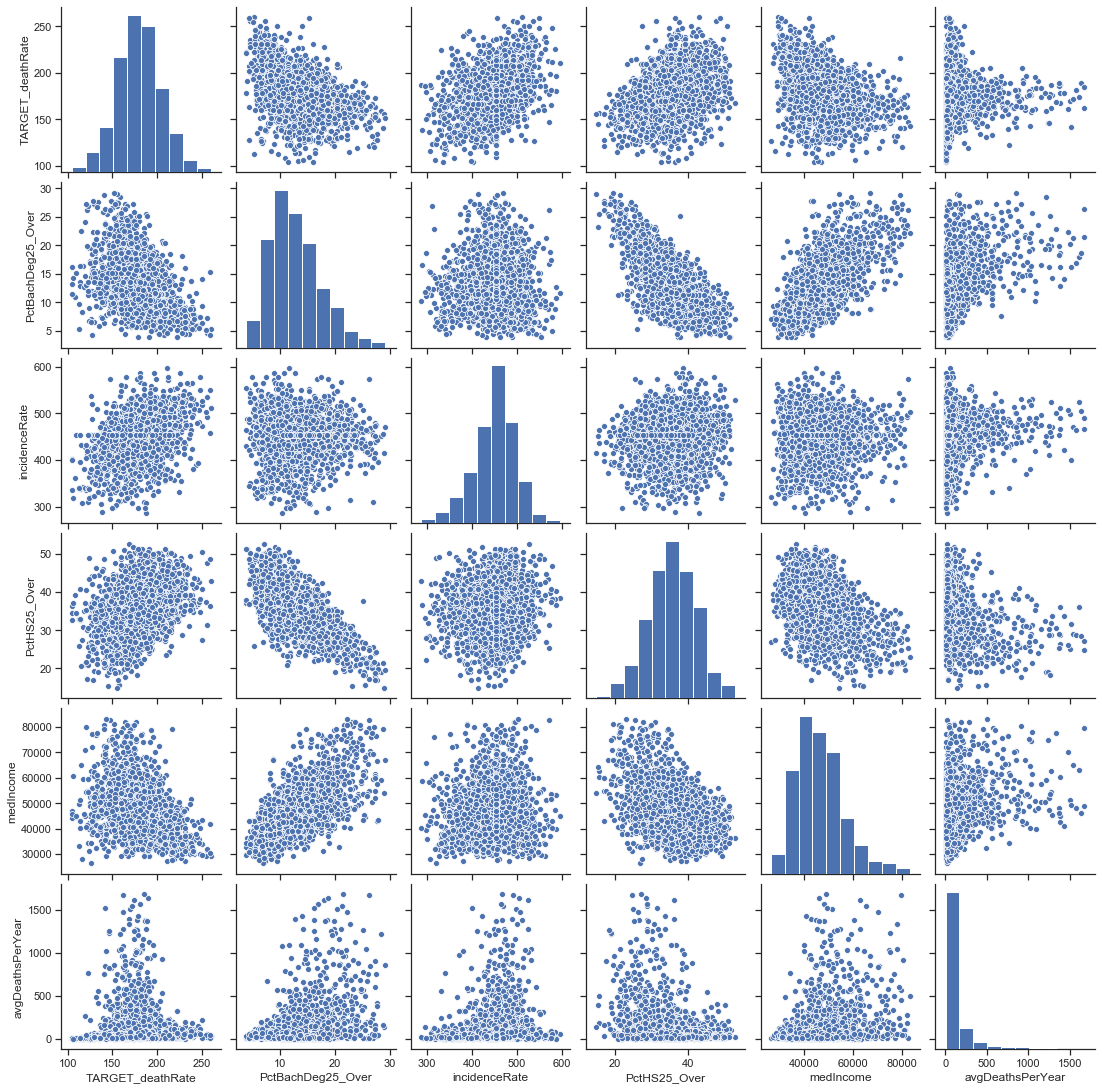

In [16]:
#%%time
sns.set(style="ticks", color_codes=True)
#plt.figure(figsize=(18, 6))
#g = sns.pairplot(data)
g = sns.pairplot(data, vars=["TARGET_deathRate", "PctBachDeg25_Over", "incidenceRate", 
                             "PctHS25_Over", "medIncome", "avgDeathsPerYear"])
                             #"PctPrivateCoverage","povertyPercent", "AvgHouseholdSize"])

#Variable: PctBachDeg25_Over    Importance: 0.37
#Variable: incidenceRate        Importance: 0.28
#Variable: PctPrivateCoverage   Importance: 0.08
#Variable: medIncome            Importance: 0.05
#Variable: povertyPercent       Importance: 0.04
#Variable: AvgHouseholdSize     Importance: 0.04

plt.show() ### Wall time: 16 s

In [16]:
#SCALING
#=======
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

# Apply auto-scaling (or any other type of scaling) and cast to DataFrame 
data = pd.DataFrame(
                    scaler.fit_transform(data), 
                    columns = data.columns, 
                    index = data.index)

# Print the first rows
data.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,StateCode,CountyCode
0,1.328637,1.545255,-0.594825,0.852749,1.564352,1.615590,-0.962711,1.682193,-0.400131,-0.628210,-0.176384,0.147314,-0.010956,-0.905202,0.481493,1.782467,0.290635,-1.924141,1.452733,-0.320797,0.132013,1.077721,-1.871203,0.025341,-0.492014,-0.939342,-0.361298,-0.439646,3.355617,0.149790,0.185783,0.330091,1.457959,-0.062251
1,-0.430031,-0.311191,-0.741673,-0.826116,0.163016,-0.212578,0.406634,-0.312706,-1.702858,-1.593344,-1.814495,-0.795769,-1.406235,-1.654015,-1.548906,2.995685,0.457459,-1.489150,2.121375,0.208533,0.064365,0.563342,0.704138,0.254144,-0.745128,-0.697259,0.234392,-0.580707,1.144632,1.096352,-1.191902,-0.722117,1.457959,-0.060302
2,-0.532045,-0.404246,-0.195071,-2.155038,0.287265,-0.400089,-0.333553,-0.210378,0.778527,0.829758,0.663148,0.524547,0.285541,0.828162,0.137157,-0.549792,1.013540,-1.023088,0.676246,-1.114792,-0.206225,-0.118998,0.211089,-0.741147,0.801677,0.382807,0.369853,-0.600615,-0.383655,0.600599,0.478271,-1.077781,1.457959,-0.052503
3,-0.065079,0.302972,0.624832,-0.422502,-0.232220,0.062352,0.129064,1.024627,0.323606,0.460132,0.171715,0.053005,0.023926,0.301220,0.683346,1.450078,-0.932742,-0.619168,-0.768884,-0.797194,1.518786,-0.675367,0.057909,-0.729707,1.251657,1.109057,0.435636,-0.596888,0.213347,-0.090026,-0.151949,-0.562586,1.457959,0.072276
4,-0.596702,-0.515911,-1.431044,-2.146451,0.349033,-0.490333,-0.722150,-0.409435,1.460908,1.610078,1.297916,-0.795769,0.913417,-0.433727,0.897072,1.666131,-1.071762,-0.339531,0.460554,-0.810427,-0.950347,-0.339446,0.230237,-0.718267,1.068852,0.680756,0.624336,-0.641354,-0.212028,-0.524191,0.401429,0.729486,1.457959,0.083974


In [18]:
## SAVING TO A CSV FILE

data.to_csv('cancer_data.csv')

In [30]:
#### Predicting "TARGET_deathRate"
    
y = data['TARGET_deathRate']
x = data.drop(['TARGET_deathRate'],axis=1)

print(x.shape) ###### 2329 rows
print(y.shape)

#SPLIT INTO TRAIN AND TEST SET
xbigtrain, xtest, ybigtrain, ytest = train_test_split(x,y,test_size=0.2,train_size=0.8, random_state=42)
xtrain, xvalid, ytrain, yvalid = train_test_split(xbigtrain,ybigtrain,test_size=0.2,train_size=0.8, random_state=42)

print(xtrain.shape) ###### 1490 == 64%
print(ytrain.shape)
print(xvalid.shape) ###### 373  == 16%
print(yvalid.shape)
print(xtest.shape)  ###### 466  == 20%
print(ytest.shape)

### train + valid = xbigtrain (80% total)

(2329, 33)
(2329,)
(1490, 33)
(1490,)
(373, 33)
(373,)
(466, 33)
(466,)


In [36]:
data.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,StateCode,CountyCode
0,1397.0,469.0,164.9,489.8,61898.0,260131.0,11.2,499.748204,39.3,36.9,41.7,2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,0.0,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,47,875
1,173.0,70.0,161.3,411.6,48127.0,43269.0,18.6,23.111234,33.0,32.2,33.7,2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,47,876
2,102.0,50.0,174.7,349.7,49348.0,21026.0,14.6,47.560164,45.0,44.0,45.8,2.62,54.2,24.0,36.6,0.0,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,47,880
3,427.0,202.0,194.8,430.4,44243.0,75882.0,17.1,342.637253,42.8,42.2,43.4,2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,47,944
4,57.0,26.0,144.4,350.1,49955.0,10321.0,12.5,0.000000,48.3,47.8,48.9,2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,47,950


In [ ]:
##########################
### 1 - LINEAR REGRESSION (baseline)
##########################

In [32]:
from sklearn.linear_model import LinearRegression
mod_lr = LinearRegression() 
mod_lr.fit(xbigtrain, ybigtrain) ############## NO Cross Validation

lr_y_hat =  mod_lr.predict(xtest)
#plt.figure(figsize=(20, 6))
#plt.scatter(xtest['incidenceRate'], lr_y_hat);
#plt.scatter(xtest['incidenceRate'], ytest);
L_y = np.linalg.norm(ytest - lr_y_hat)**2
print("Loss using L2 norm is: {0:.2f}".format(L_y)) ##Loss using L2 norm is: 261.52

#mean square error (the L2 loss, smaller is better) and accuracy score (higher is better here)
#plt.figure(figsize=(18, 6))
#plt.scatter(ytest,lr_y_hat)
#plt.xlabel("ytest")
#plt.ylabel("lr_y_hat")
print(r2_score(ytest, lr_y_hat)) ############# 0.44236994439185096  - checking the ACCURACY


from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ytest, lr_y_hat)
print("MAE = : {0:.2f}".format(mae))


Loss using L2 norm is: 156734.55
0.4439135886798451
MAE = : 13.98


In [33]:
from sklearn.model_selection import cross_val_score
cv_linreg = cross_val_score(mod_lr, x, y, cv=5,scoring='r2')
print(cv_linreg)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_linreg)))

cvMAE_linreg = cross_val_score(mod_lr, x, y, cv=5,scoring='neg_mean_absolute_error')
print(cvMAE_linreg)
print("Mean 5-Fold MAE: {}".format(np.mean(cvMAE_linreg)))


[0.42836878 0.50048711 0.35820888 0.41911585 0.42211271]
Mean 5-Fold R Squared: 0.42565866393177404
[-13.86928089 -14.29156624 -14.27193298 -13.90864984 -13.77019665]
Mean 5-Fold MAE: -14.022325320670962


In [34]:
cvMAE_mean = np.mean(cvMAE_linreg)
cvMAE_mean

-14.022325320670962

In [35]:
#Metrics calculation by sklearn.metrics
#Sklearn provides the number of metrics to evaluate accuracy. The next method is to calculate metrics with sklearn functions.

import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(ytest, lr_y_hat)
mse = metrics.mean_squared_error(ytest, lr_y_hat)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest, lr_y_hat)

print("Results of sklearn.metrics NOT SCALED:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)
 
#Results of sklearn.metrics:
#MAE: 13.977258331730164
#MSE: 336.34022710626
#RMSE: 18.339580886875794
#R-Squared: 0.4439135886798451
#Mean 5-Fold R Squared: 0.42565866393177404
#Mean 5-Fold MAE: -14.022325320670962

#Results of sklearn.metrics SCALED:
#MAE: 0.5701490353525981
#MSE: 0.5596436969473533
#RMSE: 0.7480933744843309
#R-Squared: 0.4439135886798421
#Mean 5-Fold R Squared: 0.4256586639317733
#Mean 5-Fold MAE: -0.5719873715742676

from sklearn.model_selection import cross_val_score
cv_linreg = cross_val_score(mod_lr, x, y, cv=5,scoring='r2')
#print(cv_linreg)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_linreg)))

cvMAE_linreg = cross_val_score(mod_lr, x, y, cv=5,scoring='neg_mean_absolute_error')
#print(cvMAE_linreg)
print("Mean 5-Fold MAE: {}".format(np.mean(cvMAE_linreg)))


Results of sklearn.metrics NOT SCALED:
MAE: 13.977258331730164
MSE: 336.34022710626
RMSE: 18.339580886875794
R-Squared: 0.4439135886798451
Mean 5-Fold R Squared: 0.42565866393177404
Mean 5-Fold MAE: -14.022325320670962


In [12]:
#print('Intercept: \n', mod_lr.intercept_)
#print('Coefficients: \n', mod_lr.coef_)

In [ ]:
#################################
### 2 - DECISION TREE REGRESSION
#################################

In [23]:
from sklearn import tree
mod_dtr = tree.DecisionTreeRegressor(criterion='mse', 
                                     max_depth=6,
                                     max_leaf_nodes=100,
                                     min_samples_leaf=20,
                                     min_samples_split=3)

#R-Squared::0.35493262733218345
#Best Hyperparameters::
#{'criterion': 'mse', 'max_depth': 6, 'max_leaf_nodes': 100, 'min_samples_leaf': 20, 'min_samples_split': 3}

mod_dtr.fit(xbigtrain, ybigtrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=100,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [20]:
%%time
from sklearn.model_selection import GridSearchCV
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [3, 5, 10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [10, 20, 40, 100],
              "max_leaf_nodes": [3, 5, 20, 100, 140],
              }

gridcv_mod_dtr = GridSearchCV(mod_dtr, param_grid, cv=5)

gridcv_mod_dtr.fit(xbigtrain,ybigtrain) ### Wall time: 4min 3s

Wall time: 5min 56s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=6, max_features=None,
                                             max_leaf_nodes=100,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=20,
                                             min_samples_split=5,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [3, 5, 20, 100, 140],
               

In [21]:
print("R-Squared::{}".format(gridcv_mod_dtr.best_score_))
print("Best Hyperparameters::\n{}".format(gridcv_mod_dtr.best_params_))

R-Squared::0.35493262733218345
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 6, 'max_leaf_nodes': 100, 'min_samples_leaf': 20, 'min_samples_split': 3}


In [24]:
dtr_y_hat =  mod_dtr.predict(xtest)
L_y = np.linalg.norm(ytest - dtr_y_hat)**2
print("Loss using L2 norm is: {0:.2f}".format(L_y)) ##Loss using L2 norm is: 336.70
print(r2_score(ytest, dtr_y_hat)) #### 0.28206499487420766  - checking the ACCURACY

Loss using L2 norm is: 336.70
0.2820649948742078


In [25]:
feature_list = list(xtrain.columns)
importances = list(mod_dtr.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

#feature_importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: PctBachDeg25_Over    Importance: 0.37
Variable: incidenceRate        Importance: 0.28
Variable: PctPrivateCoverage   Importance: 0.08
Variable: medIncome            Importance: 0.05
Variable: povertyPercent       Importance: 0.04
Variable: AvgHouseholdSize     Importance: 0.04
Variable: PctBlack             Importance: 0.03
Variable: PctHS18_24           Importance: 0.02
Variable: PctHS25_Over         Importance: 0.02
Variable: PctOtherRace         Importance: 0.02
Variable: avgDeathsPerYear     Importance: 0.01
Variable: MedianAge            Importance: 0.01
Variable: PctBachDeg18_24      Importance: 0.01
Variable: PctEmployed16_Over   Importance: 0.01
Variable: PctPublicCoverage    Importance: 0.01
Variable: avgAnnCount          Importance: 0.0
Variable: popEst2015           Importance: 0.0
Variable: studyPerCap          Importance: 0.0
Variable: MedianAgeMale        Importance: 0.0
Variable: MedianAgeFemale      Importance: 0.0
Variable: PercentMarried       Importance: 0.

In [30]:
from sklearn.model_selection import cross_val_score
cv_mod_dtr = cross_val_score(mod_dtr, x, y, cv=5,scoring='r2')
print(cv_mod_dtr)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_mod_dtr)))

[0.32796046 0.42622539 0.30341688 0.28525461 0.27389065]
Mean 5-Fold R Squared: 0.32334959932685525


In [ ]:
#################################
### 3 - RANDOM FOREST REGRESSION
#################################

In [31]:
from sklearn.ensemble import RandomForestRegressor
mod_rfr = RandomForestRegressor(#n_estimators = 100,
                                criterion='mse', 
                                max_depth=8,
                                max_leaf_nodes=100,
                                min_samples_leaf=10,
                                min_samples_split=5,
                                random_state = 42)
#Best Hyperparameters::
#{'criterion': 'mse', 'max_depth': 8, 'max_leaf_nodes': 100, 'min_samples_leaf': 10, 'min_samples_split': 5}

mod_rfr.fit(xbigtrain, ybigtrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=100,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [32]:
rfr_y_hat =  mod_rfr.predict(xtest)
#plt.figure(figsize=(20, 6))
#plt.scatter(xtest['incidenceRate'], rfr_y_hat);
#plt.scatter(xtest['incidenceRate'], ytest);

L_y = np.linalg.norm(ytest - rfr_y_hat)**2
print("Loss using L2 norm is: {0:.2f}".format(L_y)) ##Loss using L2 norm is: 260.89

#plt.figure(figsize=(18, 6))
#plt.scatter(ytest,rfr_y_hat)
#plt.xlabel("ytest")
#plt.ylabel("rfr_y_hat")
print(r2_score(ytest, rfr_y_hat)) ##### 0.44370471615902796   - checking the ACCURACY

Loss using L2 norm is: 260.03
0.4455409422510477


In [33]:
feature_list = list(xtrain.columns)
importances = list(mod_rfr.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

#feature_importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: PctBachDeg25_Over    Importance: 0.32
Variable: incidenceRate        Importance: 0.22
Variable: avgDeathsPerYear     Importance: 0.05
Variable: medIncome            Importance: 0.04
Variable: PctPrivateCoverage   Importance: 0.04
Variable: AvgHouseholdSize     Importance: 0.03
Variable: PctHS25_Over         Importance: 0.03
Variable: PctEmployed16_Over   Importance: 0.03
Variable: povertyPercent       Importance: 0.02
Variable: PctHS18_24           Importance: 0.02
Variable: PctUnemployed16_Over Importance: 0.02
Variable: PctPublicCoverageAlone Importance: 0.02
Variable: PctBlack             Importance: 0.02
Variable: PctOtherRace         Importance: 0.02
Variable: avgAnnCount          Importance: 0.01
Variable: popEst2015           Importance: 0.01
Variable: MedianAge            Importance: 0.01
Variable: MedianAgeMale        Importance: 0.01
Variable: MedianAgeFemale      Importance: 0.01
Variable: PercentMarried       Importance: 0.01
Variable: PctNoHS18_24         Importa

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV
param_grid_rfr = {"n_estimators": [80, 120, 160],
              "criterion": ["mse", "mae"],
              "min_samples_split": [5, 10, 20],
              "max_depth": [6, 8, 10],
              "min_samples_leaf": [10, 20, 40],
              "max_leaf_nodes": [20, 100, 140],
              }

gridcv_mod_rfr = GridSearchCV(mod_rfr, param_grid_rfr, cv=5)

gridcv_mod_rfr.fit(xtrain,ytrain) ### Wall time: 4h 11min 10s

In [48]:
print("R-Squared::{}".format(gridcv_mod_rfr.best_score_))
print("Best Hyperparameters::\n{}".format(gridcv_mod_rfr.best_params_))

NameError: name 'gridcv_mod_rfr' is not defined

In [ ]:
from sklearn.model_selection import cross_val_score
cv_mod_rfr = cross_val_score(mod_rfr, x, y, cv=5,scoring='r2')
print(cv_mod_rfr)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_mod_rfr)))

In [ ]:
#################################
### 4 - SVR
#################################

In [34]:
%%time

from sklearn.svm import SVR
mod_svr = SVR(kernel='rbf', C=0.5)
mod_svr.fit(xtrain, ytrain) 

svr_y_hat = mod_svr.predict(xvalid)
#plt.figure(figsize=(20, 6))
#plt.scatter(xvalid['incidenceRate'], svr_y_hat);
#plt.scatter(xvalid['incidenceRate'], yvalid);

L_y = np.linalg.norm(yvalid - svr_y_hat)**2
print("Loss using L2 norm is: {0:.2f}".format(L_y)) ##Loss using L2 norm is: 316,716.32

#plt.figure(figsize=(18, 6))
#plt.scatter(yvalid, svr_y_hat)
#plt.xlabel("yvalid")
#plt.ylabel("svr_y_hat")
print(r2_score(yvalid, svr_y_hat)) ########### 0.3654627811141884    - checking the ACCURACY

Loss using L2 norm is: 186.56
0.5261336433043089
Wall time: 195 ms


In [35]:
svr_y_hat = mod_svr.predict(xtest)

L_y = np.linalg.norm(ytest - svr_y_hat)**2
print("Loss using L2 norm is: {0:.2f}".format(L_y)) ##Loss using L2 norm is: 266.89
print(r2_score(ytest, svr_y_hat)) ########### 0.43091721799558613    - checking the ACCURACY

Loss using L2 norm is: 262.18
0.4409515877710034


In [36]:
from sklearn.model_selection import cross_val_score
cv_mod_svr = cross_val_score(mod_svr, x, y, cv=5,scoring='r2')
print(cv_mod_svr)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_mod_svr)))

[0.43246251 0.51962561 0.43556777 0.44265958 0.42509411]
Mean 5-Fold R Squared: 0.451081913110294


In [ ]:
###################
##### SHAP
###################

In [37]:
i = 1
observation = xtest.iloc[[i]]
print(f"Observation true label: {ytest.iloc[i]}")
print(f"Observation predicted label:  {rfr_y_hat[i]}")
observation

Observation true label: 0.7594430310209943
Observation predicted label:  0.897594732089408


,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,StateCode,CountyCode
840,-0.287786,-0.143692,1.06529,0.019128,-0.123506,0.295606,-0.409435,-0.937764,-0.915697,-0.995439,1.231859,-0.534186,0.245752,0.220272,-0.549792,-1.461019,1.012049,-0.747315,0.473198,-0.138577,-0.412928,-1.871203,-0.07762,-0.013911,0.42005,-1.636396,1.91606,0.103497,-0.400693,-0.281554,0.533403,-0.605103,1.222581


In [38]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)

import shap
# Need to load JS vis in the notebook
shap.initjs()

explainer = shap.TreeExplainer(mod_rfr)
shap_values = explainer.shap_values(xtest)

i = 1
print(explainer.expected_value) #############?????????????????????????
print(rfr_y_hat[i])

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[i,:], xtest.iloc[i,:])

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


-0.0039867985518226585
0.897594732089408


In [ ]:
### RED == affects POSITIVELY in the result
### BLUE == affects NEGATIVELY in the result

#The above explanation shows features each contributing to push the model output from the base value 
#(the average model output over the training dataset we passed) to the model output. Features pushing the 
#prediction higher are shown in red, those pushing the prediction lower are in blue 
#(these force plots are introduced in our Nature BME paper).

In [ ]:
###############################################
##### SHAP for global interpretation of a model
###############################################

In [39]:
observations = xtest.sample(466, random_state=42)
shap_values = explainer.shap_values(observations)
shap.force_plot(explainer.expected_value, shap_values, features=observations, link="logit")

In [ ]:
#Blue color == LOW value of the feature
#Red color  == HIGH value of the feature

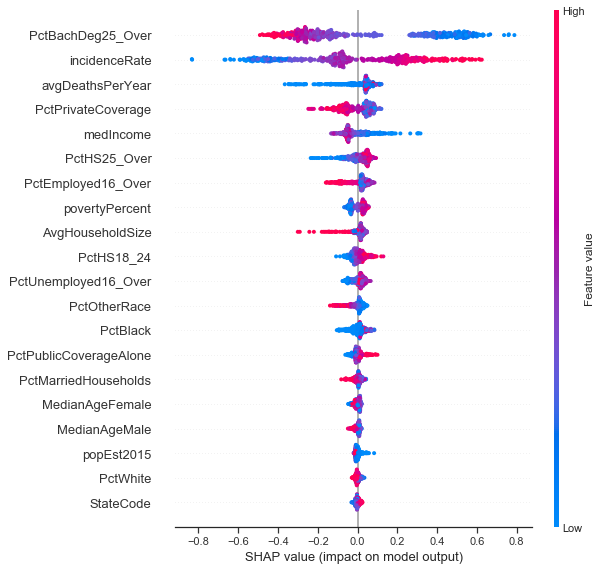

In [40]:
shap.summary_plot(shap_values, features=observations)

In [213]:
#Blue color == LOW value of the feature
#Red color  == HIGH value of the feature

#Close to vertical axis ZERO == no impact
#RIGHT of the vertical axis  == POSITIVE impact
#LEFT of the vertical axis   == NEGATIVE impact


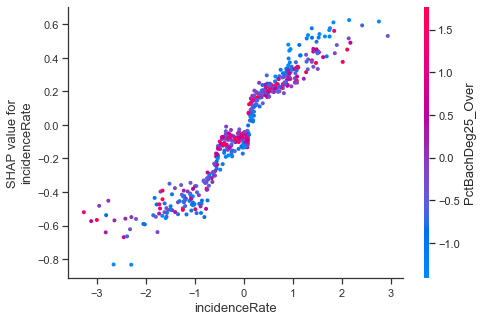

In [41]:
#https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d
#B) SHAP Dependence Plot — Global Interpretability
#You may ask how to show a partial dependence plot. The partial dependence plot shows the marginal effect one or 
#two features have on the predicted outcome of a machine learning model (J. H. Friedman 2001). 
#It tells whether the relationship between the target and a feature is linear, monotonic or more complex. 

#In order to create a dependence plot, you only need one line of code: 
#shap.dependence_plot(“incidenceRate”, shap_values, X_train). 
#
#The function automatically includes another variable that your chosen variable interacts most with. 
#The following plot shows there is an approximately linear and positive trend between “incidenceRate” and the target variable, 
#and “incidenceRate” interacts with “PctBachDeg25_Over” frequently.

#The SHAP Dependence Plot
#Suppose you want to know “volatile acidity” and the variable that it interacts the most, you can do 
#shap.dependence_plot(“volatile acidity”, shap_values, X_train). The plot below shows there exists an approximately linear 
#but negative relationship between “volatile acidity” and the target variable. This negative relationship is already 
#demonstrated in the variable importance plot Exhibit (K).

shap.dependence_plot("incidenceRate", shap_values, observations)

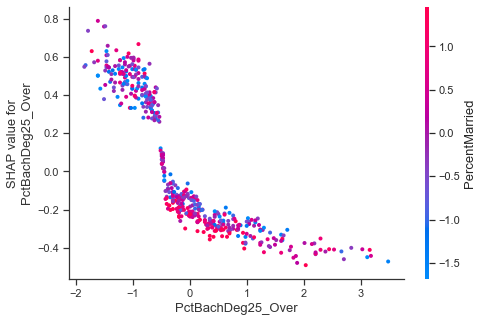

In [42]:
shap.dependence_plot("PctBachDeg25_Over", shap_values, observations)

In [ ]:
## the bigger the value of "PctBachDeg25_Over", the smaller the SHAP value impact

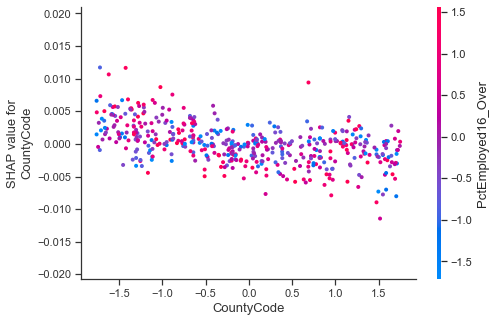

In [43]:
shap.dependence_plot("CountyCode", shap_values, observations)

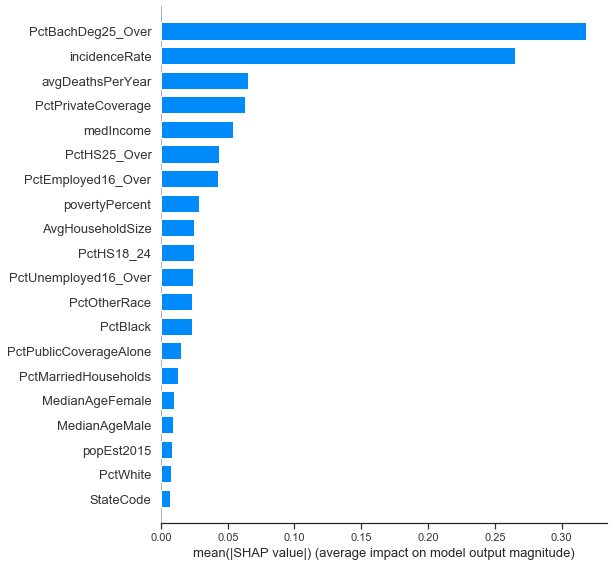

In [44]:
shap.summary_plot(shap_values, observations, plot_type="bar")

In [46]:
#https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")

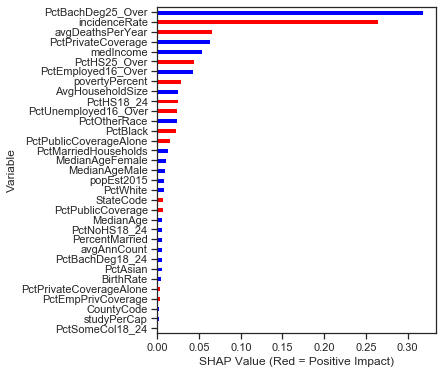

In [47]:
ABS_SHAP(shap_values, observations)###X_train)

In [ ]:
##################### Dropping features

In [46]:
data_2feat = data[["TARGET_deathRate", "PctBachDeg25_Over", "incidenceRate"]]#,"avgDeathsPerYear", "PctPrivateCoverage",
                  # "medIncome", "PctHS25_Over"]]

data_2feat

,TARGET_deathRate,PctBachDeg25_Over,incidenceRate
0,-0.594825,1.452733,0.852749
1,-0.741673,2.121375,-0.826116
2,-0.195071,0.676246,-2.155038
3,0.624832,-0.768884,-0.422502
4,-1.431044,0.460554,-2.146451
...,...,...,...
3039,1.175513,0.460554,0.074490
3040,1.485526,-0.229657,0.074490
3041,-1.349462,1.948822,0.074490
3042,-1.218930,0.503693,0.074490


In [47]:
### "povertyPercent", "AvgHouseholdSize"])

y2feat = data_2feat['TARGET_deathRate']
x2feat = data_2feat.drop(['TARGET_deathRate'],axis=1)

print(x2feat.shape) ###### 2329 rows
print(y2feat.shape)

######################################################################
#SPLIT INTO TRAIN AND TEST SET
xbigtrain, xtest, ybigtrain, ytest = train_test_split(x2feat,y2feat,test_size=0.2,train_size=0.8, random_state=42)
xtrain, xvalid, ytrain, yvalid = train_test_split(xbigtrain,ybigtrain,test_size=0.2,train_size=0.8, random_state=42)

print(xtrain.shape) ###### 1490 == 64%
print(ytrain.shape)
print(xvalid.shape) ###### 373  == 16%
print(yvalid.shape)
print(xtest.shape)  ###### 466  == 20%
print(ytest.shape)

### train + valid = xbigtrain (80% total)

(2329, 2)
(2329,)
(1490, 2)
(1490,)
(373, 2)
(373,)
(466, 2)
(466,)


In [48]:
%%time

from sklearn.svm import SVR
mod_svr = SVR(kernel='rbf', C=0.5)
mod_svr.fit(xtrain, ytrain) 

svr_y_hat = mod_svr.predict(xvalid)
#plt.figure(figsize=(20, 6))
#plt.scatter(xvalid['incidenceRate'], svr_y_hat);
#plt.scatter(xvalid['incidenceRate'], yvalid);

L_y = np.linalg.norm(yvalid - svr_y_hat)**2
print("Loss using L2 norm is: {0:.2f}".format(L_y)) ##Loss using L2 norm is: 221.67

#plt.figure(figsize=(18, 6))
#plt.scatter(yvalid, svr_y_hat)
#plt.xlabel("yvalid")
#plt.ylabel("svr_y_hat")
print(r2_score(yvalid, svr_y_hat)) ########### 0.4369473613263226    - checking the ACCURACY

Loss using L2 norm is: 221.67
0.4369473613263226
Wall time: 122 ms


In [49]:
svr_y_hat = mod_svr.predict(xtest)

L_y = np.linalg.norm(ytest - svr_y_hat)**2
print("Loss using L2 norm is: {0:.2f}".format(L_y)) ##Loss using L2 norm is: 266.89
print(r2_score(ytest, svr_y_hat)) ########### 0.43091721799558613    - checking the ACCURACY

Loss using L2 norm is: 307.91
0.34344611637318634


In [50]:
xvalid

,PctBachDeg25_Over,incidenceRate
2531,0.137018,0.074490
2758,-0.337502,-0.609281
516,-0.445348,0.262355
2658,-1.847339,0.822692
1309,-0.510055,0.074490
...,...,...
217,0.331140,1.644950
1909,0.374278,-0.375270
3017,-0.164949,0.066988
2126,1.344888,-0.482614


In [51]:
from sklearn.model_selection import cross_val_score
cv_mod_svr = cross_val_score(mod_svr, x, y, cv=5,scoring='r2')
print(cv_mod_svr)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_mod_svr))) ###Mean 5-Fold R Squared: 0.4585208193152452

[0.45242867 0.52325019 0.43889575 0.44659374 0.43143574]
Mean 5-Fold R Squared: 0.4585208193152452


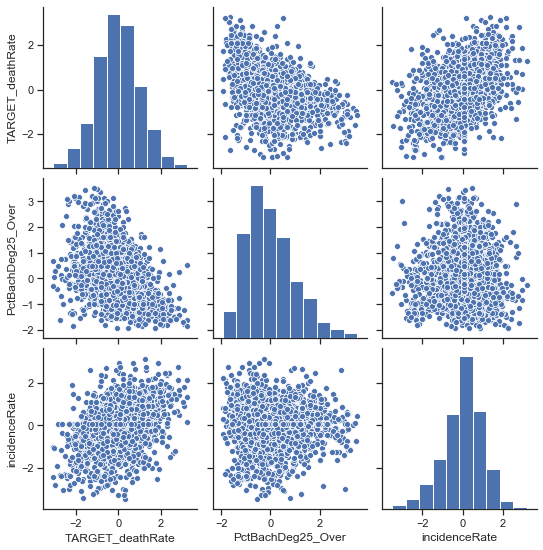

Wall time: 2.01 s


In [52]:
%%time
sns.set(style="ticks", color_codes=True)
#g = sns.pairplot(data)
g = sns.pairplot(data_2feat, vars=["TARGET_deathRate", "PctBachDeg25_Over", "incidenceRate"])#,"avgDeathsPerYear", 
                                 # "PctPrivateCoverage","medIncome", "PctHS25_Over"])

#Variable: PctBachDeg25_Over    Importance: 0.37
#Variable: incidenceRate        Importance: 0.28
#Variable: PctPrivateCoverage   Importance: 0.08
#Variable: medIncome            Importance: 0.05
#Variable: povertyPercent       Importance: 0.04
#Variable: AvgHouseholdSize     Importance: 0.04

plt.show() ### Wall time: 16 s

In [ ]:
###################
##### SHAP - SVR
###################

In [53]:
i = 1
observation = xtest.iloc[[i]]
print(f"Observation true label: {ytest.iloc[i]}")
print(f"Observation predicted label:  {rfr_y_hat[i]}")
observation

Observation true label: 0.7594430310209943
Observation predicted label:  0.8783346300811786


,PctBachDeg25_Over,incidenceRate
840,-0.747315,1.06529


In [54]:
%%time
import sklearn
import shap
from sklearn.model_selection import train_test_split

# print the JS visualization code to the notebook
shap.initjs()

# use Kernel SHAP to explain test set predictions
svr_explainer = shap.KernelExplainer(mod_svr.predict, xtest)
svr_shap_values = svr_explainer.shap_values(xtest, nsamples=100)

Using 466 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_


Wall time: 15 s


l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


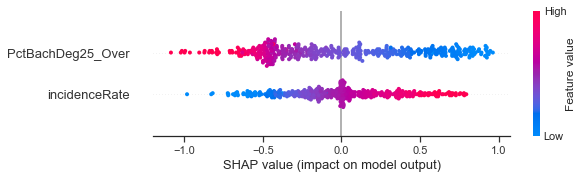

In [55]:
shap.summary_plot(svr_shap_values, xtest)

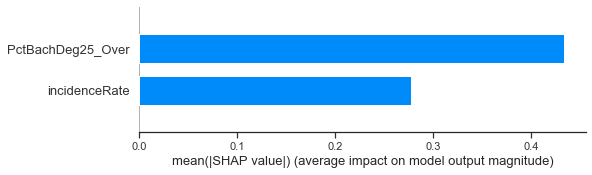

In [56]:
shap.summary_plot(svr_shap_values, xtest, plot_type="bar")

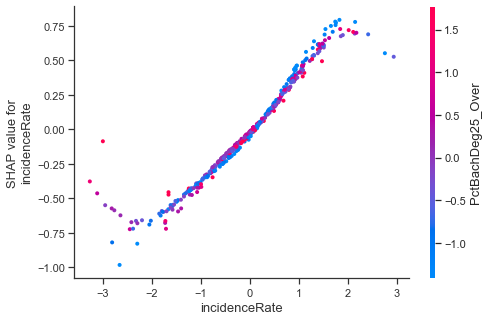

In [57]:
shap.dependence_plot("incidenceRate", svr_shap_values, xtest)

In [58]:
shap.force_plot(svr_explainer.expected_value, svr_shap_values[1,:], xtest.iloc[1,:])

In [60]:
shap.force_plot(svr_explainer.expected_value, svr_shap_values, xtest)